# Introduction

The dataset at the center of this project is a comprehensive Ethiopian insurance dataset containing records of various policyholders and their respective insurance details. Each row in the dataset represents an individual policyholder, identified by a unique POLICYHOLDER_ID. The dataset captures various attributes related to the policyholder and their insurance policies, such as:

- SEX: The gender of the policyholder.  
- INSR_BEGIN: The start date of the insurance policy.  
- INSR_END: The end date of the insurance policy.  
- INSR_TYPE: The type of insurance policy.  
- INSURED_VALUE: The value of the insured vehicle.  
- PREMIUM: The premium amount paid by the policyholder.  
- PROD_YEAR: The year the vehicle was manufactured.  
- TYPE_VEHICLE: The type of vehicle insured.  
- MAKE: The make of the vehicle.  
- CLAIM_PAID: The amount paid out in claims.  

The primary variable of interest in this dataset is the PREMIUM, which represents the amount paid by the policyholder for their insurance coverage. By performing Exploratory Data Analysis (EDA) on this dataset, I aim to uncover patterns, trends, and insights that can provide a deeper understanding of the factors influencing premium amounts, as well as other significant relationships within the data.

The EDA process will include data cleaning, visualization, and statistical analysis to identify any anomalies, correlations, and underlying structures in the data. This analysis will serve as a foundation for building predictive models and making data-driven decisions in the context of insurance policies and premium calculations.

# Notes:

1) SEX variable has 3 factors (0,1,2) which relate to "Male", "Female", "Unknown"
2) INSR_TYPE variable has 3 factors (1201,1202,1204) which relate to "Comprehensive", "Third Party with Fire and Theft", "Third Party Only"
3) Where there was missing data pertaining to a policyholder, all data surrounding that policyholder was removed, as the purpose is to at a later stage compile a summary for each policyholder over multiple years.

# Initial Setup

### Setting working directory

In [141]:
setwd("~/02_Corporate Profile/Project Portfolio/Vehicle Insurance Data")

### Loading all vehicle insurance data

In [142]:
motor_data_2014_2018 = read.csv("~/02_Corporate Profile/Project Portfolio/Vehicle Insurance Data/motor_data14-2018.csv")

# Initial Data Inspection & Cleaning

 ### Obtaining initial understanding of the data

In [143]:
# Obtaining the number of rows and columns
dim(motor_data_2014_2018)

[1] 508499     16

In [144]:
# Visually inspecting the structure of the dataframe
head(motor_data_2014_2018)

SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
0,08-AUG-17,07-AUG-18,08,1202,519755.2,5097.83,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-16,07-AUG-17,08,1202,519755.2,6556.52,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-15,07-AUG-16,08,1202,519755.2,6556.52,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-14,07-AUG-15,08,1202,519755.2,5102.83,5000029885,2007,4,6,Pick-up,3153,NISSAN,Own Goods,NA
0,08-AUG-17,07-AUG-18,08,1202,1400000.0,13304.87,5000029901,2010,4,7,Pick-up,2494,TOYOTA,Own Goods,NA
0,08-AUG-16,07-AUG-17,08,1202,1400000.0,16438.15,5000029901,2010,4,7,Pick-up,2494,TOYOTA,Own Goods,NA


### Determining (and adjusting where needed) the structure of the data

In [145]:
# Viewing the existing structure of the data
str(motor_data_2014_2018)

'data.frame':	508499 obs. of  16 variables:
 $ SEX              : int  0 0 0 0 0 0 0 0 1 1 ...
 $ INSR_BEGIN       : Factor w/ 1461 levels "01-APR-15","01-APR-16",..: 344 343 342 341 344 343 342 341 1144 1143 ...
 $ INSR_END         : Factor w/ 1691 levels "01-APR-15","01-APR-16",..: 345 344 343 342 345 344 343 342 1265 1264 ...
 $ EFFECTIVE_YR     : Factor w/ 140 levels "","-1","-2","-6",..: 21 21 21 21 21 21 21 21 27 27 ...
 $ INSR_TYPE        : int  1202 1202 1202 1202 1202 1202 1202 1202 1202 1202 ...
 $ INSURED_VALUE    : num  519755 519755 519755 519755 1400000 ...
 $ PREMIUM          : num  5098 6557 6557 5103 13305 ...
 $ OBJECT_ID        : num  5e+09 5e+09 5e+09 5e+09 5e+09 ...
 $ PROD_YEAR        : int  2007 2007 2007 2007 2010 2010 2010 2010 2012 2012 ...
 $ SEATS_NUM        : int  4 4 4 4 4 4 4 4 0 0 ...
 $ CARRYING_CAPACITY: num  6 6 6 6 7 7 7 7 220 220 ...
 $ TYPE_VEHICLE     : Factor w/ 11 levels "Automobile","Bus",..: 4 4 4 4 4 4 4 4 11 11 ...
 $ CCM_TON          : num 

In [146]:
# Adjusting the structure of the data
motor_data_2014_2018$INSR_BEGIN = as.Date(motor_data_2014_2018$INSR_BEGIN, format = "%d-%b-%y")
motor_data_2014_2018$INSR_END = as.Date(motor_data_2014_2018$INSR_END, format = "%d-%b-%y")
motor_data_2014_2018$SEX = as.factor(motor_data_2014_2018$SEX)
motor_data_2014_2018$INSR_TYPE = as.factor(motor_data_2014_2018$INSR_TYPE)
motor_data_2014_2018$MAKE = as.factor(motor_data_2014_2018$MAKE)
motor_data_2014_2018$USAGE = as.factor(motor_data_2014_2018$USAGE)
motor_data_2014_2018$TYPE_VEHICLE    = as.factor(motor_data_2014_2018$TYPE_VEHICLE)

In [147]:
# Ensuring the structure of the data is as required
str(motor_data_2014_2018)

'data.frame':	508499 obs. of  16 variables:
 $ SEX              : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 2 2 ...
 $ INSR_BEGIN       : Date, format: "2017-08-08" "2016-08-08" ...
 $ INSR_END         : Date, format: "2018-08-07" "2017-08-07" ...
 $ EFFECTIVE_YR     : Factor w/ 140 levels "","-1","-2","-6",..: 21 21 21 21 21 21 21 21 27 27 ...
 $ INSR_TYPE        : Factor w/ 3 levels "1201","1202",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ INSURED_VALUE    : num  519755 519755 519755 519755 1400000 ...
 $ PREMIUM          : num  5098 6557 6557 5103 13305 ...
 $ OBJECT_ID        : num  5e+09 5e+09 5e+09 5e+09 5e+09 ...
 $ PROD_YEAR        : int  2007 2007 2007 2007 2010 2010 2010 2010 2012 2012 ...
 $ SEATS_NUM        : int  4 4 4 4 4 4 4 4 0 0 ...
 $ CARRYING_CAPACITY: num  6 6 6 6 7 7 7 7 220 220 ...
 $ TYPE_VEHICLE     : Factor w/ 11 levels "Automobile","Bus",..: 4 4 4 4 4 4 4 4 11 11 ...
 $ CCM_TON          : num  3153 3153 3153 3153 2494 ...
 $ MAKE             : Factor w/ 746 levels " 

### Formating column format of the data

In [148]:
### Removing columns that will not be needed
motor_data_2014_2018 = subset(motor_data_2014_2018, select = -c(EFFECTIVE_YR, CARRYING_CAPACITY, SEATS_NUM, CCM_TON, USAGE))
head(motor_data_2014_2018)

SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,TYPE_VEHICLE,MAKE,CLAIM_PAID
0,2017-08-08,2018-08-07,1202,519755.2,5097.83,5000029885,2007,Pick-up,NISSAN,NA
0,2016-08-08,2017-08-07,1202,519755.2,6556.52,5000029885,2007,Pick-up,NISSAN,NA
0,2015-08-08,2016-08-07,1202,519755.2,6556.52,5000029885,2007,Pick-up,NISSAN,NA
0,2014-08-08,2015-08-07,1202,519755.2,5102.83,5000029885,2007,Pick-up,NISSAN,NA
0,2017-08-08,2018-08-07,1202,1400000.0,13304.87,5000029901,2010,Pick-up,TOYOTA,NA
0,2016-08-08,2017-08-07,1202,1400000.0,16438.15,5000029901,2010,Pick-up,TOYOTA,NA


In [149]:
### Renaming columns
colnames(motor_data_2014_2018)[colnames(motor_data_2014_2018) == "OBJECT_ID"] = "POLICYHOLDER_ID"

### Rearanging the the columns into a sensible order
motor_data_2014_2018 = motor_data_2014_2018[, c(
  "POLICYHOLDER_ID", "SEX", "INSR_BEGIN", "INSR_END", "INSR_TYPE", 
  "INSURED_VALUE", "PREMIUM", "PROD_YEAR", "TYPE_VEHICLE", 
  "MAKE", "CLAIM_PAID"
)]
head(motor_data_2014_2018)

    # Column order:
        # Policyholder Information: Information about the policyholder.
          # POLICYHOLDER_ID
          # SEX
        # Insurance Details: Dates and types of insurance.
          # INSR_BEGIN
          # INSR_END
          # INSR_TYPE
          # INSURED_VALUE
          # PREMIUM
        # Vehicle Details: Information about the insured vehicle.
          # PROD_YEAR
          # TYPE_VEHICLE
          # MAKE
        # Claims Information: Information about claims.
          # CLAIM_PAID

POLICYHOLDER_ID,SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,PROD_YEAR,TYPE_VEHICLE,MAKE,CLAIM_PAID
5000029885,0,2017-08-08,2018-08-07,1202,519755.2,5097.83,2007,Pick-up,NISSAN,NA
5000029885,0,2016-08-08,2017-08-07,1202,519755.2,6556.52,2007,Pick-up,NISSAN,NA
5000029885,0,2015-08-08,2016-08-07,1202,519755.2,6556.52,2007,Pick-up,NISSAN,NA
5000029885,0,2014-08-08,2015-08-07,1202,519755.2,5102.83,2007,Pick-up,NISSAN,NA
5000029901,0,2017-08-08,2018-08-07,1202,1400000.0,13304.87,2010,Pick-up,TOYOTA,NA
5000029901,0,2016-08-08,2017-08-07,1202,1400000.0,16438.15,2010,Pick-up,TOYOTA,NA


### Creating 2018 insurance dataframe

In [150]:
# Creating the dataframe
insurance_data = motor_data_2014_2018[format(motor_data_2014_2018$INSR_END, "%Y") == "2018", ]

# Resetting the row names to ascending order
rownames(insurance_data) = NULL
head(insurance_data)

POLICYHOLDER_ID,SEX,INSR_BEGIN,INSR_END,INSR_TYPE,INSURED_VALUE,PREMIUM,PROD_YEAR,TYPE_VEHICLE,MAKE,CLAIM_PAID
5000029885,0,2017-08-08,2018-08-07,1202,519755.2,5097.83,2007,Pick-up,NISSAN,NA
5000029901,0,2017-08-08,2018-08-07,1202,1400000.0,13304.87,2010,Pick-up,TOYOTA,NA
5000030358,1,2017-11-24,2018-11-23,1202,3400000.0,26804.72,2012,Truck,IVECO,NA
5000031274,1,2017-05-09,2018-05-08,1202,0.0,1949.30,2000,Bus,TOYOTA,NA
5000031488,1,2017-11-28,2018-11-27,1202,2550000.0,23784.79,2010,Truck,IVECO,NA
5000031489,1,2017-11-28,2018-11-27,1202,2550000.0,23784.79,2010,Truck,IVECO,NA


#  Cleaning Variables

In [151]:
# Determining if there are any missing data points, and in which column
sapply(insurance_data, function(x) sum(is.na(x)))

POLICYHOLDER_ID             SEX      INSR_BEGIN        INSR_END       INSR_TYPE 
              0               0               0               0               0 
  INSURED_VALUE         PREMIUM       PROD_YEAR    TYPE_VEHICLE            MAKE 
              0               1              10               0               2 
     CLAIM_PAID 
         129557

### Variable:  SEX

In [152]:
### Obtaining summary of the variable
summary(insurance_data$SEX)

0     1     2 
64633 62695 11817

In [153]:
### Changing the levels of the variable to be more descriptive
levels(insurance_data$SEX) = c("Male", "Female", "Unknown")

### Checking summary of the variable to ensure level change was done correctly
summary(insurance_data$SEX)
  # Male  Female  Unknown 
  # 64633   62695   11817 

Male  Female Unknown 
  64633   62695   11817

### Variable:  INSR_TYPE

In [154]:
### Obtaining summary of the variable
summary(insurance_data$INSR_TYPE)

1201   1202   1204 
 32448 106644     53

In [155]:
### Changing the levels of the variable to be more descriptive
levels(insurance_data$INSR_TYPE) = c("Comprehensive", "Third Party with Fire and Theft", "Third Party Only")

### Checking summary of the variable to ensure level change was done correctly
summary(insurance_data$INSR_TYPE)

Comprehensive Third Party with Fire and Theft 
                          32448                          106644 
               Third Party Only 
                             53

### Variable:  PREMIUM

In [156]:
### Number of missing values for variable
sum(is.na(insurance_data$PREMIUM))

[1] 1

In [157]:
# Identify POLICYHOLDER_IDs with missing values for the variable
policyholders_with_na_premium = unique(insurance_data$POLICYHOLDER_ID[is.na(insurance_data$PREMIUM)])

### Count number of policholders that will be removed from the dataset for record purposes
length(policyholders_with_na_premium)

[1] 1

In [158]:
# Remove POLICYHOLDER_IDs which contain missing PREMIUM data
insurance_data = insurance_data[!insurance_data$POLICYHOLDER_ID %in% policyholders_with_na_premium, ]

# Verify no missing values for the variable
sum(is.na(insurance_data$PREMIUM))

[1] 0

### Variable:  PROD_YEAR

In [159]:
### Number of missing values for variable
sum(is.na(insurance_data$PROD_YEAR))

[1] 10

In [160]:
### Identify POLICYHOLDER_IDs with missing values for the variable
policyholders_with_na_PROD_YEAR = unique(insurance_data$POLICYHOLDER_ID[is.na(insurance_data$PROD_YEAR)])

### Count number of policholders that will be removed from the dataset for record purposes
length(policyholders_with_na_PROD_YEAR)

[1] 10

In [161]:
### Remove POLICYHOLDER_IDs which contain missing PREMIUM data
insurance_data = insurance_data[!insurance_data$POLICYHOLDER_ID %in% policyholders_with_na_PROD_YEAR, ]

### Verify no missing values for the variable
sum(is.na(insurance_data$PROD_YEAR))

[1] 0

### Variable:  MAKE

In [162]:
### Number of missing values for variable
sum(is.na(insurance_data$MAKE))

[1] 2

In [163]:
### Identify POLICYHOLDER_IDs with missing values for the variable
policyholders_with_na_MAKE = unique(insurance_data$POLICYHOLDER_ID[is.na(insurance_data$MAKE)])

### Count number of policholders that will be removed from the dataset for record purposes
length(policyholders_with_na_MAKE)

[1] 2

In [164]:
### Remove POLICYHOLDER_IDs which contain missing PREMIUM data
insurance_data = insurance_data[!insurance_data$POLICYHOLDER_ID %in% policyholders_with_na_MAKE, ]

### Verify no missing values for the variable
sum(is.na(insurance_data$PROD_YEAR))

[1] 0

### Variable:  CLAIM_PAID

In [165]:
### Number of missing values for variable
sum(is.na(insurance_data$CLAIM_PAID))

[1] 129546

Upon inspection, all 0 values have been captured as na.  We will assume that there are no missing claims data and simply change the na's to 0.  


In [166]:
### Assigning 0 to claims_paid NA values
insurance_data$CLAIM_PAID[is.na(insurance_data$CLAIM_PAID)] = 0

### Verify no missing values for the variable
sum(is.na(insurance_data$CLAIM_PAID))

[1] 0

### Verifying that all missing elements have been handled

In [169]:
# Determining if there are any missing data points, and in which column
sapply(insurance_data, function(x) sum(is.na(x)))

POLICYHOLDER_ID             SEX      INSR_BEGIN        INSR_END       INSR_TYPE 
              0               0               0               0               0 
  INSURED_VALUE         PREMIUM       PROD_YEAR    TYPE_VEHICLE            MAKE 
              0               0               0               0               0 
     CLAIM_PAID 
              0

The above provides confirmation that all required missing elements have been handled...

#  EDA on Variables

### What is the distribution of policyholders by gender in the insurance dataset?

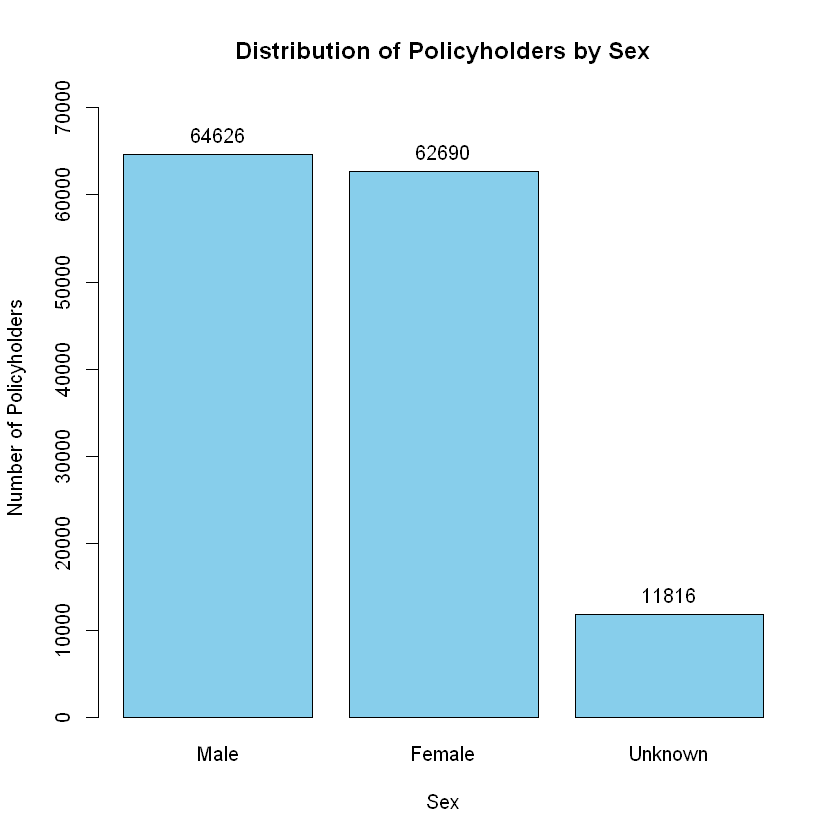

In [171]:
### Frequency table of policyholder gender characteristics
sex_distribution = table(insurance_data$SEX)

# Creating a bar plot to show the gender characteristics of policyholders
sex_distribution_bp = barplot(sex_distribution, 
                               main = "Distribution of Policyholders by Sex", 
                                xlab = "Sex", 
                                ylab = "Number of Policyholders",
                                col = "skyblue",
                                ylim = c(0, max(sex_distribution) * 1.1))                             

# Adding text labels centered on the bars
text(x = sex_distribution_bp, 
     y = sex_distribution+2, 
     label = sex_distribution, 
     pos = 3, cex = 1, col = "black")

The bar plot above shows the distribution of policyholders by gender.  Some key insights from the plot include:

- Male Policyholders: There are 64,626 male policyholders.
- Female Policyholders: There are 62,690 female policyholders.
- Unknown Gender Policyholders: There are 11,816 policyholders whose gender is unknown.

This visualization clearly indicates that the numbers of male and female policyholders are relatively close, with a slightly higher number of males. There is also a significant number of policyholders with unknown gender.

### How does the distribution of insurance types vary by gender among policyholders?

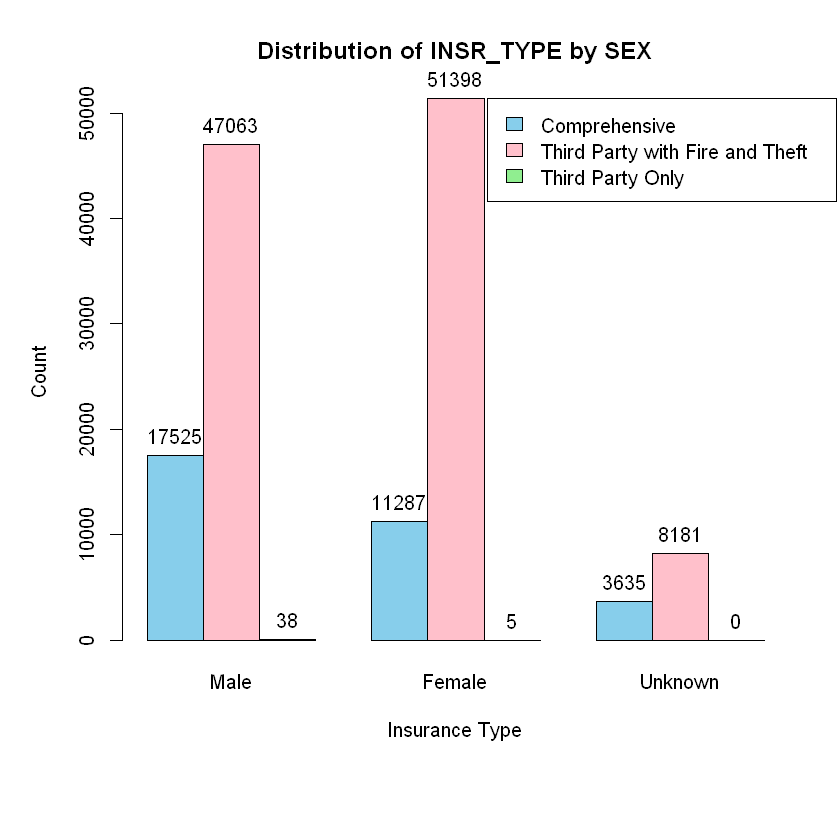

In [172]:
# Distribution of INSR_TYPE relative to SEX
INSR_TYPE_vs_SEX = table(insurance_data$INSR_TYPE, insurance_data$SEX)

# Adjust the plotting area to make space for the legend
par(mar = c(8, 5, 4, 2) + 0.1, oma = c(0, 0, 0, 0), xpd = TRUE)

# Create the bar plot for the contingency table
INSR_TYPE_vs_SEX_bp = barplot(INSR_TYPE_vs_SEX, beside = TRUE, 
                              main = "Distribution of INSR_TYPE by SEX", 
                              xlab = "Insurance Type", 
                              ylab = "Count", 
                              col = c("skyblue", "pink", "lightgreen"))

# Adding text labels centered on the bars
text(x = INSR_TYPE_vs_SEX_bp, 
     y = INSR_TYPE_vs_SEX+2, 
     label = INSR_TYPE_vs_SEX, 
     pos = 3, cex = 1, col = "black")

# Add the legend outside the plot area
legend("topright", inset = c(-0.07, 0), legend = rownames(INSR_TYPE_vs_SEX), fill = c("skyblue", "pink", "lightgreen"), xpd = TRUE)

The bar plot above illustrates the distribution of different types of insurance by gender among policyholders.  Some key insights from the plot are:

- Comprehensive Insurance:
This type is more common among male policyholders compared to female policyholders.
A notable number of policyholders with unknown gender also have comprehensive insurance.

- Third Party with Fire and Theft Insurance:
This is the most common insurance type among all genders, especially females, who have a slightly higher count than males.
A significant number of policyholders with unknown gender also have this type of insurance.

- Third Party Only Insurance:
This type is the least common among all genders, with very few policyholders opting for it.
Only male and female policyholders have this insurance type, with males having a slightly higher count.

The chart effectively shows that the "Third Party with Fire and Theft" insurance type is the most popular among all gender categories, while "Third Party Only" is the least popular. It also highlights some gender-specific preferences in insurance types.

### Are there any correlations between PREMIUM, INSURED_VALUE and PROD_YEAR?

In [173]:
# Creating a dataframe to use for correlation calculations
correlation_df = data.frame(insurance_data$PREMIUM, 
                            insurance_data$INSURED_VALUE, 
                            insurance_data$PROD_YEAR)

# Calculating correlations between variables
corr_matrix = cor(correlation_df)
corr_matrix

,insurance_data.PREMIUM,insurance_data.INSURED_VALUE,insurance_data.PROD_YEAR
insurance_data.PREMIUM,1.0000000,0.7544155,0.2166609
insurance_data.INSURED_VALUE,0.7544155,1.0000000,0.2481529
insurance_data.PROD_YEAR,0.2166609,0.2481529,1.0000000


**Correlation Values**

PREMIUM and INSURED_VALUE:
- Correlation: 0.754
- Interpretation: There is a strong positive correlation between PREMIUM and INSURED_VALUE. This suggests that as the insured value of a policy increases, the premium also tends to increase.

PREMIUM and PROD_YEAR:
- Correlation: 0.217
- Interpretation: There is a weak positive correlation between PREMIUM and PROD_YEAR. This suggests a slight tendency for newer production years to be associated with higher premiums, but the relationship is not very strong.

INSURED_VALUE and PROD_YEAR:
- Correlation: 0.248
- Interpretation: There is a weak positive correlation between INSURED_VALUE and PROD_YEAR. This suggests that newer production years tend to have higher insured values, but the relationship is relatively weak.

**Key Insights**
- The strongest correlation is between PREMIUM and INSURED_VALUE, indicating that the insured value is a significant factor in determining the premium amount.
- The correlations between PROD_YEAR and the other variables (PREMIUM and INSURED_VALUE) are weak, suggesting that the production year has a relatively minor influence on the premium and insured value.

### What are the most common vehicle makes under insurance?

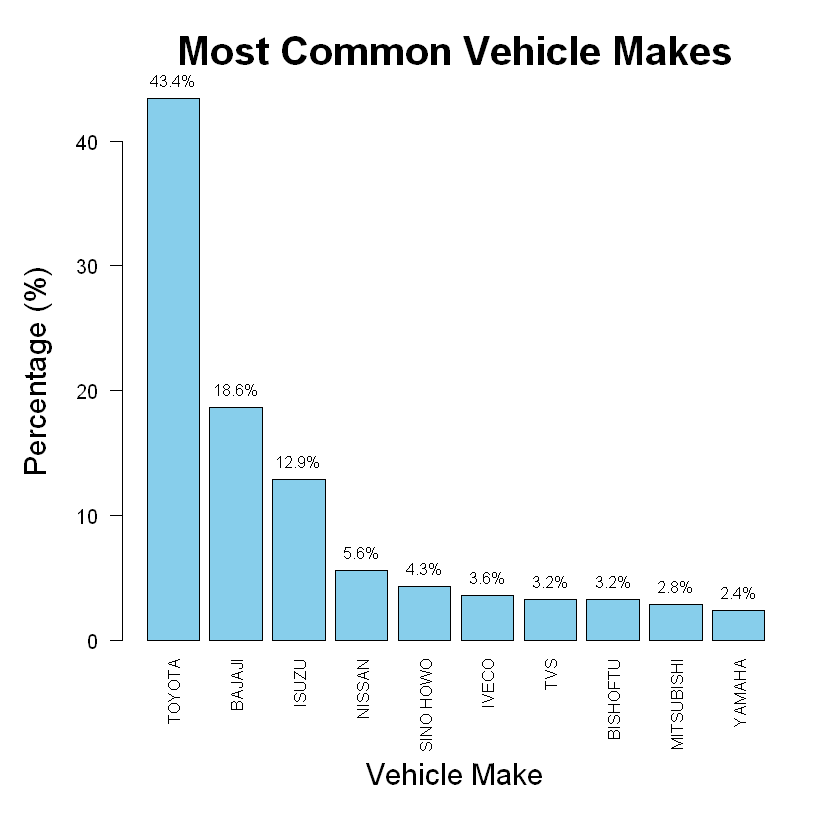

In [176]:
# Identifying and Analyzing the Top 10 Vehicle Makes
make_counts = table(insurance_data$MAKE)
top_makes = sort(make_counts, decreasing = TRUE)[1:10]
top_makes_df = as.data.frame(top_makes)
names(top_makes_df) = c("MAKE", "Count")
top_makes_df$Percentage = (top_makes_df$Count / sum(top_makes_df$Count)) * 100

# Adjust the margins and plot parameters
par(mar = c(8, 5, 4, 2) + 0.1, oma = c(0, 0, 0, 0), xpd = TRUE)  

# Create the bar plot
bar_midpoints = barplot(top_makes_df$Percentage, 
                         main = "Most Common Vehicle Makes", 
                         xlab = "", 
                         ylab = "Percentage (%)", 
                         col = "skyblue", 
                         border = "black", 
                         las = 2,  # las = 2 for vertical labels
                         cex.names = 2,
                         cex.main = 2,   # Adjust main title size
                         cex.lab = 1.5)  # Adjust label size

# Add text labels centered on the bars
text(x = bar_midpoints, 
     y = top_makes_df$Percentage, 
     label = paste0(round(top_makes_df$Percentage, 1), "%"), 
     pos = 3, 
     cex = 0.8, 
     col = "black")


# Add the make labels below each bar
text(x = bar_midpoints, 
     y = par("usr")[3] - 1,  # Position below the plot area
     label = top_makes_df$MAKE, 
     srt = 90,  # Rotate labels
     adj = 1, 
     xpd = TRUE, 
     cex = 0.8)

# Add the x-axis label slightly lower
mtext("Vehicle Make", side = 1, line = 5, cex = 1.5)

The bar plot above shows the percentage distribution of the top 10 most common vehicle makes among policyholders in the insurance dataset. It was found that Toyota is the dominant vehicle make among the insured, with a significantly higher percentage compared to the others. Bajaj and Isuzu are also common but to a lesser extent. The remaining vehicle makes have smaller but notable representations in the insurance dataset.

### What is the profit/loss to the insurer over the period?

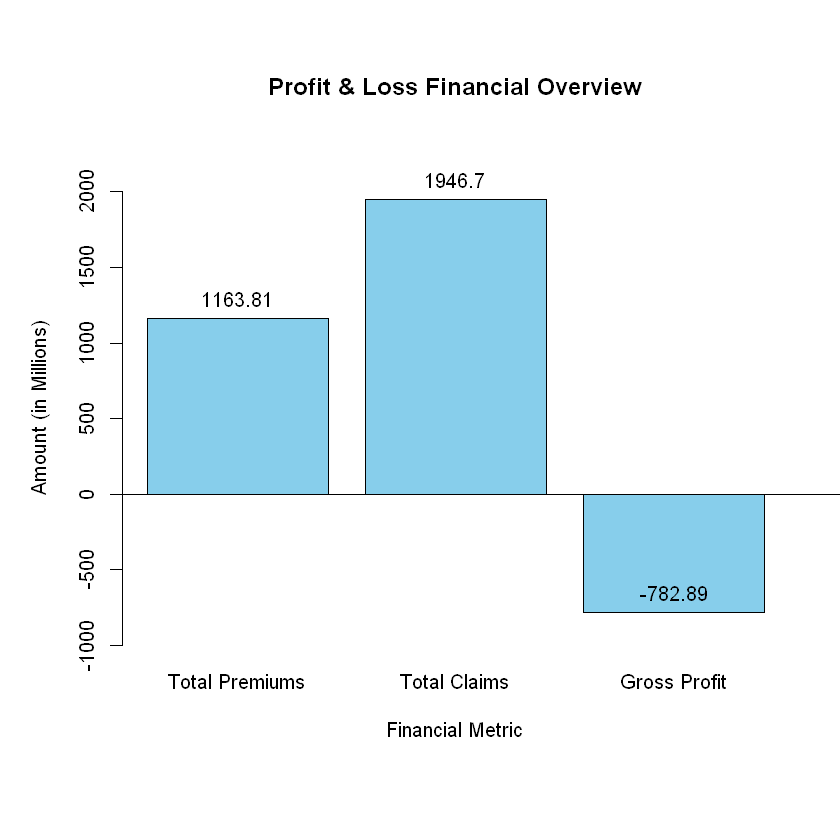

In [203]:
# Calculate total premiums, total claims, and gross profit (in millions)
total_premiums = sum(insurance_data$PREMIUM)/1000000
total_claims = sum(insurance_data$CLAIM_PAID)/1000000
gross_profit = (total_premiums - total_claims)

# Adjust the margins and plot parameters
par(mar = c(8, 5, 7, 2) + 0.1, oma = c(0, 0, 0, 0), xpd = TRUE)  

# Combine the values into a vector
pnl = c(total_premiums, total_claims, gross_profit)
names(pnl) = c("Total Premiums", "Total Claims", "Gross Profit")

# Create a bar plot
pnl_bp = barplot(pnl, 
                main = "Profit & Loss Financial Overview",
                xlab = "Financial Metric",
                ylab = "Amount (in Millions)",
                col = "skyblue",
                ylim = c(-1000, max(pnl) * 1.1))

# Add a horizontal line to clearly indicate y=0
segments(x0 = 0, y0 = 0, x1 = 2000, y1 = 0)

# Add text labels centered on the bars
text(x = pnl_bp, 
     y = pnl, 
     label = round(pnl, 2), 
     pos = 3, cex = 1, col = "black")


The bar plot provided above illustrates the financial metrics of the insurer, specifically the total premiums collected, the total claims paid, and the resulting gross profit (or loss). Some key insights from the plot are:

- Total Premiums: The insurer collected a total of 1163.81 million in premiums.
- Total Claims: The insurer paid out a total of 1946.7 million in claims.
- Gross Profit: The gross profit, calculated as total premiums minus total claims, is -782.89 million.
  
**Key Point:**  
The insurer experienced a loss of 782.89 million over the period, as indicated by the negative gross profit. This suggests that the total claims paid out significantly exceeded the total premiums collected.